## Assignment Week 9 and 10 - Biswajit Sharma

### Question 1 - Activity 9

In [1]:
# import modules

import re
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Set up display options
pd.options.display.max_columns=60
pd.options.display.max_rows=50
pd.options.display.max_colwidth=80

In [3]:
#Read the HTML from Gutenberg top 100 ebooks url "https://www.gutenberg.org/browse/scores/top"

# Using verify=True parameters checks the SSL in a HTTP call via reuests package
response = requests.get("https://www.gutenberg.org/browse/scores/top", verify=True)

In [4]:
#function to check status of web request
def check_web_request_status(response):
    if response.status_code == 200:
        print("Successful web request")
    else:
        print(f"Web request unsuccessful, Http code: {response.status_code}")

In [5]:
# check the status of web request using the above user defined function
check_web_request_status(response)

Successful web request


In [6]:
#decode the web response from bytes to string
html_data = response.content.decode()

In [7]:
# Use BeautifulSoup for parsing the web html response data
soup = BeautifulSoup(html_data, "html.parser")

In [8]:
#Find all href tags and store in a list
hrefs = [a_tag.get("href") for a_tag in soup.find_all("a") ]

In [9]:
#print first 30 elements
print(f"First 30 elements:\n {hrefs[:30]}")

First 30 elements:
 ['/', '/about/', '/about/', '/policy/collection_development.html', '/about/contact_information.html', '/about/background/', '/policy/permission.html', '/policy/privacy_policy.html', '/policy/terms_of_use.html', '/ebooks/', '/ebooks/', '/ebooks/bookshelf/', '/browse/scores/top', '/ebooks/offline_catalogs.html', '/help/', '/help/', '/help/copyright.html', '/help/errata.html', '/help/file_formats.html', '/help/faq.html', '/policy/', '/help/public_domain_ebook_submission.html', '/help/submitting_your_own_work.html', '/help/mobile.html', '/attic/', '/donate/', '/donate/', '#books-last1', '#authors-last1', '#books-last7']


In [10]:
#use a regular expression to find numeric digits in the href links
prog = re.compile(r"\d+")

In [11]:
file_num = []
# the top 100 ebook links we are looking for starts from 33rd position in the above extracted href list
for i in range(33,133):
    link_str = prog.findall(hrefs[i])
    #checks if the regex found the link and didn't returned an empty list
    if link_str: 
        file_num.append(int(link_str[0].strip()))

In [12]:
# Print the file numbers of top 100 eBooks
print(f"File numbers of top 100 eBooks:\n{file_num}")

File numbers of top 100 eBooks:
[84, 1342, 2701, 1513, 145, 2641, 100, 37106, 16389, 67979, 6761, 394, 2160, 4085, 1259, 5197, 6593, 11, 64317, 72971, 72969, 174, 72966, 2542, 1952, 1080, 844, 5200, 98, 345, 2554, 76, 28054, 25344, 43, 408, 1260, 72968, 72970, 1400, 72972, 1661, 1232, 6130, 2591, 72967, 46, 5740, 58585, 205, 219, 1727, 1998, 2000, 4300, 72963, 2600, 74, 768, 3207, 72950, 30254, 23, 36034, 1184, 7370, 45, 1497, 41445, 2814, 996, 8492, 514, 42324, 33283, 8800, 4363, 55, 600, 244, 730, 27827, 35, 2680, 16, 3296, 15399, 120, 161, 2852, 67098, 158, 10007, 5827, 10, 16328, 1399, 36, 24869, 16119]


In [13]:
# Print first 2000 text chars of soup object
print(soup.text[:2000])





Top 100 | Project Gutenberg



























Menu▾



About
          ▾

▾


About Project Gutenberg
Collection Development
Contact Us
History & Philosophy
Permissions & License
Privacy Policy
Terms of Use



Search and Browse
      	  ▾

▾


Book Search
Bookshelves
Frequently Downloaded
Offline Catalogs



Help
          ▾

▾


All help topics →
Copyright How-To
Errata, Fixes and Bug Reports
File Formats
Frequently Asked Questions
Policies →
Public Domain eBook Submission
Submitting Your Own Work
Tablets, Phones and eReaders
The Attic →


Donate










Donation







Frequently Viewed or Downloaded
These listings are based on the number of times each eBook gets downloaded.
      Multiple downloads from the same Internet address on the same day count as one download, and addresses that download more than 100 eBooks in a day are considered robots and are not counted.

Downloaded Books
2024-02-16289145
last 7 days2086226
last 30 days7432239



Top 100 EBooks yesterday
T

In [14]:
# Find the index of "Top 100 EBooks yesterday" in the soup text

# splitlines method will split the soup text into list of all lines. Then we can use the index method of that list to locate the index of line
# that contains "Top 100 EBooks yesterday" text
index_num = soup.text.splitlines().index('Top 100 EBooks yesterday')

index_num

113

In [15]:
#Find the next 100 lines of text starting with the above index to create a list
# Index method only returns the first occurence, for this problem we necond second occurrence which is 10 lines from the first one, so
#start index is index_num + 10
start_index = index_num + 10
end_index = start_index + 100 # we are fetching the next 100 lines of text
temp_list = [line for line in soup.text.splitlines()[start_index: end_index]]

In [16]:
# extract book names
titles=[]
for i in range(len(temp_list)):
    # using regex match to extarct only alphabets, . and blanks to locate the start end position of the book name in the string
    start,end=re.match('^[a-zA-Z .]*',temp_list[i]).span()
    # Using span object to separate book name from the entire text string
    titles.append(temp_list[i][start:end].strip())

In [17]:
# Print the book names
for book_name in titles:
    print(book_name)

Frankenstein
Pride and Prejudice by Jane Austen
Moby Dick
Romeo and Juliet by William Shakespeare
Middlemarch by George Eliot
A Room with a View by E. M.  Forster
The Complete Works of William Shakespeare by William Shakespeare
Little Women
The Enchanted April by Elizabeth Von Arnim
The Blue Castle
The Adventures of Ferdinand Count Fathom
Cranford by Elizabeth Cleghorn Gaskell
The Expedition of Humphry Clinker by T.  Smollett
The Adventures of Roderick Random by T.  Smollett
Twenty years after by Alexandre Dumas and Auguste Maquet
My Life
History of Tom Jones
Alice
The Great Gatsby by F. Scott  Fitzgerald
A dead man
The girl from nowhere by Mrs. Baillie Reynolds
The Picture of Dorian Gray by Oscar Wilde
The horror at Red Hook by H. P.  Lovecraft
A Doll
The Yellow Wallpaper by Charlotte Perkins Gilman
A Modest Proposal by Jonathan Swift
The Importance of Being Earnest
Metamorphosis by Franz Kafka
A Tale of Two Cities by Charles Dickens
Dracula by Bram Stoker
Crime and Punishment by Fyod

### Question 2 - Activity 10

In [18]:
# import modules

import json
import urllib.request, urllib.parse, urllib.error
import os

In [19]:
# Retrieve apikey for OMDB from APIkeys.json file
with open("APIkeys.json") as fhandle:
    secretapikey = json.load(fhandle)["apikey"]

In [20]:
# OMDB API url
serviceurl = "https://www.omdbapi.com/?"
apikey = f"&apikey={secretapikey}"

In [21]:
# Function to print output data from api response
def print_json(json_data):
    list_keys=['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 
               'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Ratings', 
               'Metascore', 'imdbRating', 'imdbVotes', 'imdbID']
    for field_name in list_keys:
        if field_name in json_data:
            print(f"{field_name}: {json_data[field_name]}")

In [22]:
# This function downloads movie poster from poster url provided in OMDB api response
def download_poster(data):
    title = str(data["Title"]) # converting to string as some movies name can be numbers only like 2012
    poster_url = data["Poster"].strip()

    # get poster from the poster url
    poster_data = urllib.request.urlopen(poster_url).read()
    
    # Get file extension by splitting at . 
    file_extension = poster_url.split(".")[-1]
    
    # Prepare file name for storing locally
    file_name = f"{title}.{file_extension}"
    
    
    cur_dir = os.getcwd()
    savelocation=f"{cur_dir}/Posters"
    
    # Creates new directory if the Posters directory does not exist. Otherwise, just use the existing path.
    if not os.path.isdir(savelocation):
        os.mkdir(savelocation)
    
    # save in current working directory
    with open(f"{savelocation}/{file_name}", "wb") as outfile:
        outfile.write(poster_data)
    

In [23]:
# This function searches movie in OMDB
def search_movie(movie_name):
    # build full url including qury parameters for HTTP get
    full_encoded_url = serviceurl + urllib.parse.urlencode({"t":str(movie_name).lower()}) + apikey
    try:
        data = urllib.request.urlopen(full_encoded_url).read()
    except urllib.error.URLError as err:
        print(f"HTTPS error encountered: {err}")
    else:
        json_data = json.loads(data)
        if json_data["Response"] == "True":
            print_json(json_data)
            download_poster(json_data)
        else:
            print(f"Error encountered while getting data from OMDB: {json_data['Error']}")

In [24]:
# Searching for movie Titanic
search_movie("titanic")

Title: Titanic
Year: 1997
Rated: PG-13
Released: 19 Dec 1997
Runtime: 194 min
Genre: Drama, Romance
Director: James Cameron
Writer: James Cameron
Actors: Leonardo DiCaprio, Kate Winslet, Billy Zane
Plot: A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.
Language: English, Swedish, Italian, French
Country: United States, Mexico
Awards: Won 11 Oscars. 126 wins & 83 nominations total
Ratings: [{'Source': 'Internet Movie Database', 'Value': '7.9/10'}, {'Source': 'Rotten Tomatoes', 'Value': '88%'}, {'Source': 'Metacritic', 'Value': '75/100'}]
Metascore: 75
imdbRating: 7.9
imdbVotes: 1,267,049
imdbID: tt0120338


In [25]:
# Searching for movie Random_error
search_movie("Random_error")

Error encountered while getting data from OMDB: Movie not found!


### Question 3

In [26]:
# Top headlines API url
api_url = "https://newsapi.org/v2/top-headlines?"

In [27]:
# Retrieve apikey for News api from APIkeys.json file
with open("APIkeys.json") as fhandle:
    news_apikey = json.load(fhandle)["news_apikey"]

In [28]:
# API query parameters in dict format
query_params = {
    "apiKey":news_apikey,
    "country": "us",
    "category":"science"}

In [29]:
#GET method request to fetch api data using above params
response = requests.get(api_url,params=query_params)

In [30]:
# This function prints news headlines retrived from HTTP get News API call
def print_headlines(data):
    for i, article in enumerate(data["articles"]):
        if i > 4:
            pass
        else:
            print(f"News# {i}")
            print(f"Title: {article['title']}")
            print(f"Description: {article['description']}")
            print(f"Source: {article['source']['name']}")
            print(f"News url: {article['url']}")
            print("-"*100)
    

In [31]:
# Check if request was successful based on HTTPstatus code and print first 5 headlines
if response.status_code == 200:
    print("success")
    print_headlines(response.json())
else:
    print(f"HTTP Error {response.status_code}")

success
News# 0
Title: Ancient Fossil That Baffled Scientists For Decades Finally Reveals Its True Identity - ScienceAlert
Description: In the 90-odd years since it was discovered, we've never found anything like an ancient, early Permian fossil discovered in the Italian Alps.
Source: ScienceAlert
News url: https://www.sciencealert.com/ancient-fossil-that-baffled-scientists-for-decades-finally-reveals-its-true-identity
----------------------------------------------------------------------------------------------------
News# 1
Title: CRISPR gene editing tool gets a revolutionary high-tech upgrade - Earth.com
Description: In the realm of scientific innovation, the past decade has seen the CRISPR/Cas systems emerge as a groundbreaking tool in genome editing.
Source: Earth.com
News url: https://www.earth.com/news/crispr-gene-editing-gets-a-revolutionary-upgrade-with-new-tool/
----------------------------------------------------------------------------------------------------
News# 2
Title:

### Question 4

In [32]:
# Read the CA housing dataset
df = pd.read_csv("ca_housing_prices.csv")

In [33]:
# view few rows
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


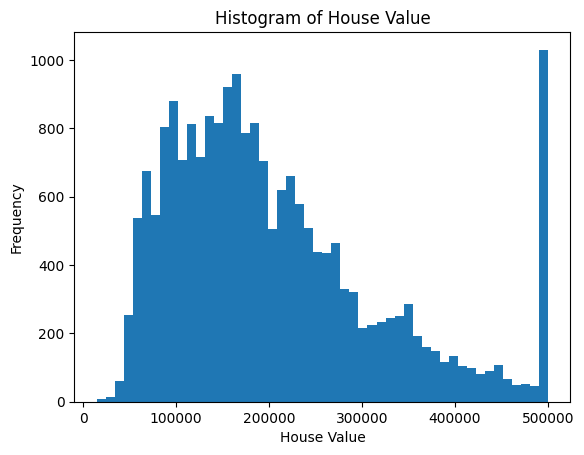

In [34]:
# create a histogram of house value
plt.hist(df["median_house_value"], bins=50)
plt.title("Histogram of House Value")
plt.xlabel("House Value")
plt.ylabel("Frequency")
plt.show()

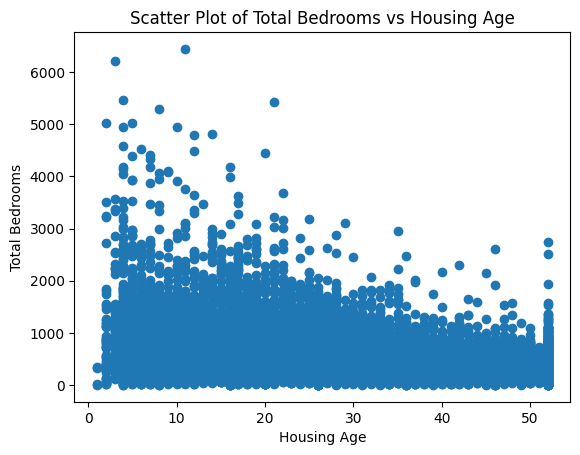

In [35]:
# create scatter plot of number of bedrooms vs house age
plt.scatter(df["housing_median_age"],df["total_bedrooms"])
plt.xlabel("Housing Age")
plt.ylabel("Total Bedrooms")
plt.title("Scatter Plot of Total Bedrooms vs Housing Age")
plt.show()

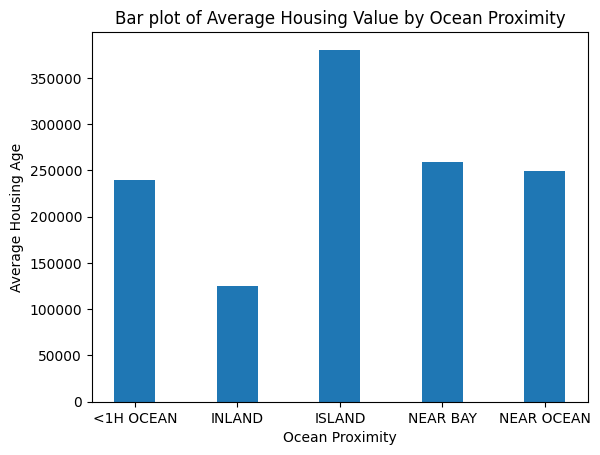

In [36]:
# create a bar plot of average housing value for ocean proximity

# get average median housing value for ocean proximity using group by function
grouped = df.groupby("ocean_proximity").mean("median_house_value")["median_house_value"]

plt.bar(grouped.index,grouped, width=0.4)
plt.xlabel("Ocean Proximity")
plt.ylabel("Average Housing Age")
plt.title("Bar plot of Average Housing Value by Ocean Proximity")
plt.show()